К задаче https://ru.stackoverflow.com/questions/1259494/Найти-точку-сумма-расстояний-до-которой-от-заданного-набора-точек-минимальна

In [1]:
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
from scipy.stats import norm
import random as rnd


In [2]:
_factor_norm = np.sqrt(2*np.pi)
def priceNormFn(x):
    return _factor_norm*norm.pdf(x)
def priceFn(x):
    v = x/2
    v2=v*v
    return 1 - v2/np.sqrt(1+v2*v2)

In [3]:
# Штраф для функции притяжения - потенциальная яма, обращающаяся в 0 на бесконечности
# На большом расстоянии уже пофиг, что там притягивает.
def attract(power, distance):
    if power == 0:
        return 0
    return -power*priceFn(distance/power)

In [4]:
# Штраф для отталкивания - постепенно убывает, обращается в ноль на бесконечности
def repell(power, distance):
    if power == 0:
        return 0
    return power*priceFn(distance/power)

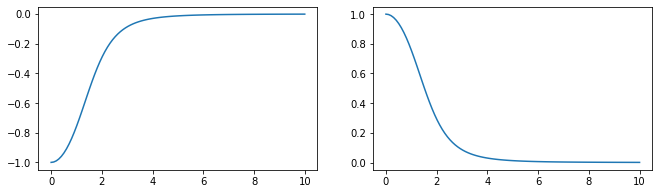

In [5]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(11,3)
x = np.linspace(0,10,100)
axs[0].plot(x, attract(1, x))
axs[1].plot(x, repell(1, x))

In [115]:
class Point:
    def __init__(self, coords, attracting, repelling):
        self.coords = np.array(coords)
        self.attracting_power = attracting
        self.repelling_power = repelling
    def potential(self, v):
        dv = self.coords - np.atleast_1d(v)
        distance = np.linalg.norm(dv)
        attracting_penalty = attract(self.attracting_power, distance) if self.attracting_power > 0 else 0
        repelling_penalty = repell(self.repelling_power, distance)
        return attracting_penalty + repelling_penalty
    def __repr__(self):
        return f"Point({tuple(self.coords)}, {self.attracting_power}, {self.repelling_power})"

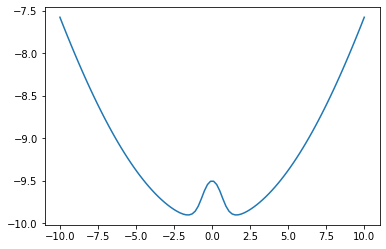

In [116]:
supermarket = Point((0.0, 0.0), attracting=10, repelling=0.5)
X = np.linspace(-10,10,100)
plt.plot(X, [supermarket.potential((_x,0)) for _x in X])

In [117]:
str(supermarket)

'Point((0.0, 0.0), 10, 0.5)'

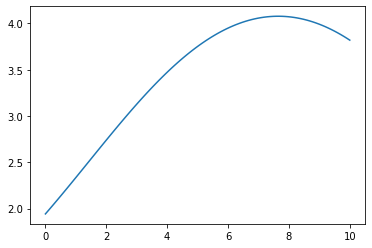

In [118]:
factory = Point((x, y), attracting=0, repelling=5)
X = np.linspace(0,10,100)
plt.plot(X, [factory.potential((_x,0)) for _x in X])

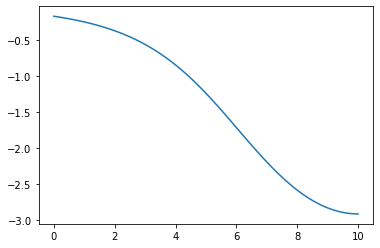

In [119]:
minishop = Point((10,1), attracting=3, repelling=0)
X = np.linspace(0,10,100)
plt.plot(X, [minishop.potential((_x,0)) for _x in X])

In [124]:
class Potential:
    def __init__(self, points):
        self.points = points
    
    def potential(self, v):
        resPot = 0.0
        for p in self.points:
            potential = p.potential(v) 
            resPot += potential
        return resPot
    def __call__(self, v):
        return self.potential(v)

In [125]:
fn = Potential((supermarket, minishop, factory))

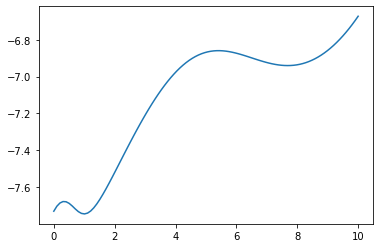

In [126]:
X = np.linspace(0,10,100)
plt.plot(X, [fn.potential((_x,0)) for _x in X])

In [127]:
X = np.linspace(-5,15,100)
Y = np.linspace(-10,10,100)


In [128]:
level = [ [ fn((x,y)) for x in X] for y in Y]


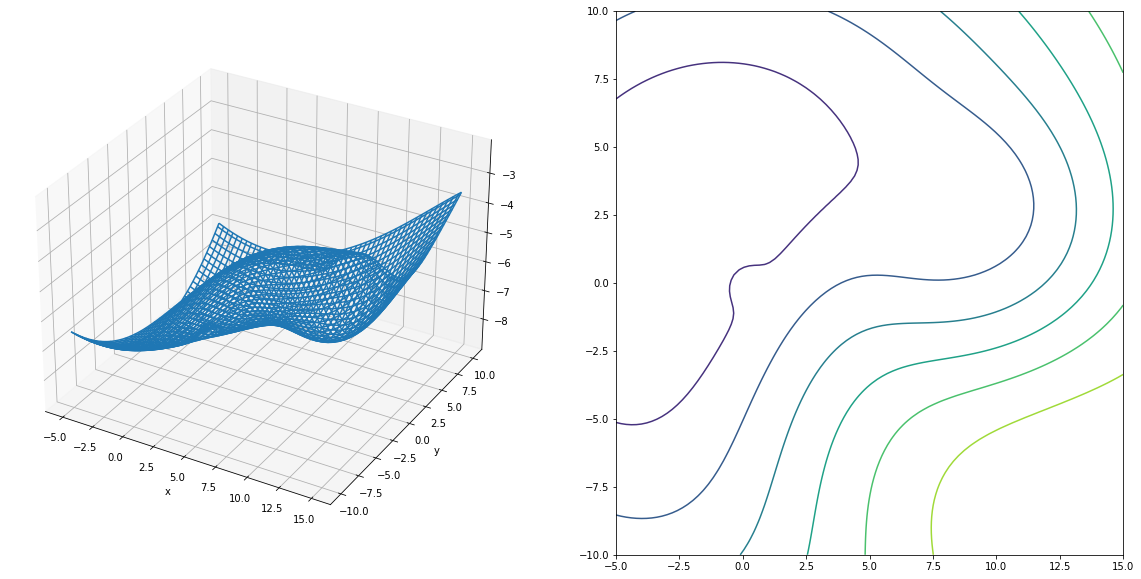

In [130]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(*np.meshgrid(X,Y), np.atleast_2d(level))
ax.set_xlabel('x')
ax.set_ylabel('y')

ax2 = fig.add_subplot(122)
ax2.contour(X,Y, level)

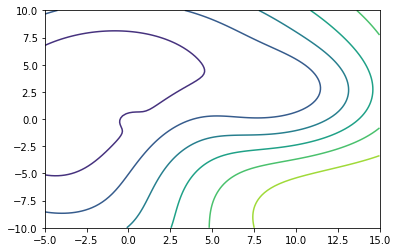

In [131]:
plt.contour(X,Y, level)

In [133]:
v = spo.minimize(lambda v: fn(v), x0=(1,0), bounds=((-5, 15), (-10, 10)))

In [134]:
v

      fun: -8.928449157839399
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.24344980e-06,  5.32907055e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 8
     njev: 12
   status: 0
  success: True
        x: array([-3.06582749,  2.01118742])

In [135]:
fn(factory.coords)

-4.043828712452321

In [136]:
fn(supermarket.coords)

-7.731590876539916

In [137]:
fn(minishop.coords)

-7.160408193509037

In [138]:
fn([-9171.37744367,    21.19829761])

-1.0982215137289586e-10

# Эксперимент со случайными точками

случайным образом накидаем в квадрат 20 на 20 сто точек, половина притягивающих и половина отталкивающих. Сила притяжения и отталкивания выбирается случайным образом в интервале $[0,3)$

In [175]:
N=100
points=[]
for _ in range(N):
    x = rnd.random()*20 - 10
    y = rnd.random()*20 - 10
    if rnd.random() > 0.5:
        attr = 3*rnd.random()
        rep = 0
    else:
        rep = 3*rnd.random()
        attr = 0
    points.append(Point((x,y), attr, rep))

In [176]:
points

[Point((4.3819534863505964, 6.13372785540415), 2.511538790169987, 0),
 Point((7.270113877034589, 2.6830278931394407), 0, 0.8411482647505225),
 Point((-3.02334344808064, 5.424526843301912), 0.9059346913942538, 0),
 Point((8.608558787398145, -9.862690739549095), 0.5135869848959193, 0),
 Point((8.178938501814383, 5.620771157865843), 2.5535433142091115, 0),
 Point((-5.848783035174645, 4.3430111484413025), 2.1880368081822583, 0),
 Point((9.963857792550577, 5.904591079273871), 1.9823825291285475, 0),
 Point((-2.4518746997961234, 5.079940799071846), 0.2315813862640299, 0),
 Point((-7.849109416011171, -9.963597525236406), 0, 0.21836771737634664),
 Point((-7.894186164199349, -4.030274321517748), 0, 0.4018206055285318),
 Point((-2.5034200167457925, -7.535864702675335), 0, 1.1691131565931085),
 Point((-7.319242988878914, 9.585633716361176), 0.5962468255188647, 0),
 Point((5.441976706915451, -0.11256438074910591), 2.9140844581807612, 0),
 Point((-6.177032265167144, -9.262090541587796), 1.122142117

In [177]:
pot = Potential(points)

In [178]:
X = np.linspace(-20,20,100)
Y = np.linspace(-20,20,100)


In [179]:
level = [ [ pot((x,y)) for x in X] for y in Y]

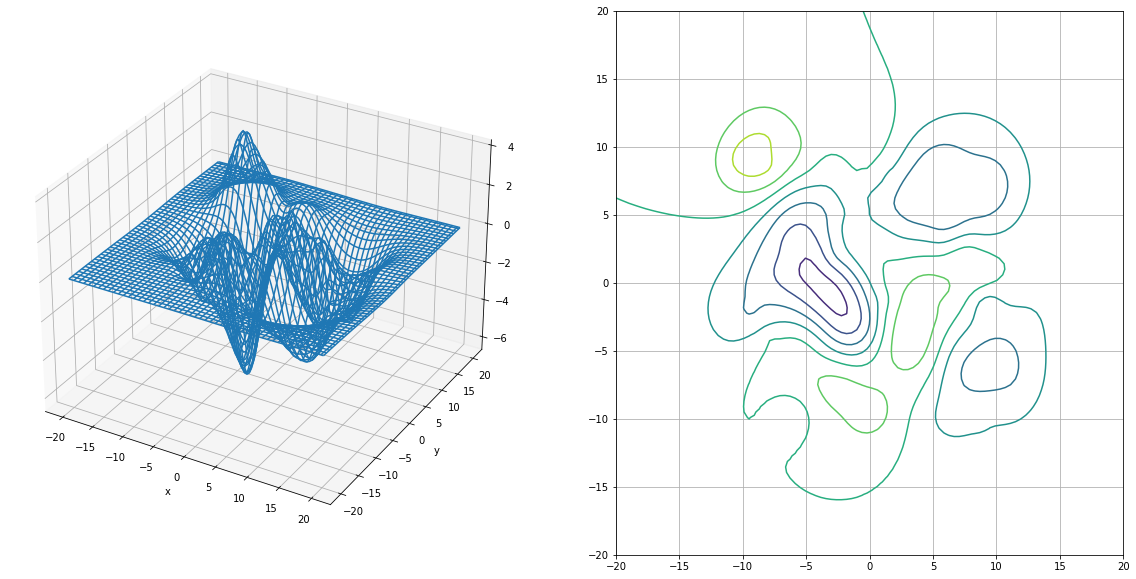

In [180]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(*np.meshgrid(X,Y), np.atleast_2d(level))
ax.set_xlabel('x')
ax.set_ylabel('y')


ax2 = fig.add_subplot(122)
ax2.contour(X,Y, level)
ax2.grid()

In [181]:
# Поиск из правого верхнего угла
spo.minimize(pot, (10,10))

      fun: -3.834392778971883
 hess_inv: array([[1.45481396, 0.211353  ],
       [0.211353  , 2.82936302]])
      jac: array([4.82797623e-06, 2.20537186e-06])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 13
     njev: 16
   status: 0
  success: True
        x: array([9.18965386, 6.82703911])

In [182]:
# Поиск из "бесконечности"
spo.minimize(pot, (30,30))

      fun: -3.8343927789992858
 hess_inv: array([[1.48499107, 0.22592221],
       [0.22592221, 2.8535172 ]])
      jac: array([ 4.17232513e-07, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 114
      nit: 8
     njev: 38
   status: 0
  success: True
        x: array([9.18964674, 6.82702892])

In [183]:
# Поиск из центра
spo.minimize(pot, (0,0))

      fun: -6.4795412369465035
 hess_inv: array([[ 2.552032  , -1.95802868],
       [-1.95802868,  2.64946082]])
      jac: array([-2.38418579e-07,  4.17232513e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([-3.16178425, -0.76452586])